# Exercise: let's do it together!

In the above illustration we used one single keras node with sigmoid activation function to perform logistic regression on a binarised version (two classes) of the `Iris` dataset. Only two features were used.

It is now time for you to try write your own code!

There are several things that can be tried as variation on the above code, for instancùe:

* what is the effect of including the other two features, which we excluded above? Does performance improve? What happens to decision boundary? 
* when implementing the network we used [rmsprop optimizer](https://keras.io/api/optimizers/rmsprop/) and [binary_crossentropy](https://keras.io/api/losses/probabilistic_losses/#binarycrossentropy-class) loss function, but other [optimizers](https://keras.io/api/optimizers/) and [loss functions](https://keras.io/api/losses/) are available and their effect could be explored

In [ ]:
import numpy as np
import keras as ks
import sklearn as sk
import tensorflow as tf
import matplotlib.pyplot as plt

### Prepare the data

In [ ]:
import pandas as pd
import sklearn.datasets

In [ ]:
iris = sklearn.datasets.load_iris()
iris.data = pd.DataFrame(iris.data, columns=iris.feature_names) #converting numpy array -> pandas DataFrame
iris.target = pd.Series(iris.target) #converting numpy array -> pandas Series

In [ ]:
#two classes, four features
features = iris.data
target = iris.target

#updating class labels. To makes things difficult we put together old classes 0 and 1
#in a new class (non virginica) and keep old class 2 (virginica) as new class 1.
#For an easier problems put together versicolor and virginica and keep setosa by itself
j = 100 ## split
target[0:j] = 0 
target[j:150] = 1

features.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Training and validation sets

In [ ]:
#we want to have the same proportion of classes in both train and validation sets
from sklearn.model_selection import StratifiedShuffleSplit

#building a StratifiedShuffleSplit object (sss among friends) with 20% data
#assigned to validation set (here called "test")
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)

#the .split() method returns (an iterable over) two lists which can be
#used to index the samples that go into train and validation sets
for train_index, val_index in sss.split(features, target):
    features_train = features.iloc[train_index, :]
    features_val   = features.iloc[val_index, :]
    target_train   = target[train_index]
    target_val     = target[val_index]
    
#let's print some shapes to get an idea of the resulting data structure
print(features_train.shape)
print(features_val.shape)
print(target_train.shape)
print(target_val.shape)

print(type(features_train))
print(type(target_train))

(120, 4)
(30, 4)
(120,)
(30,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


### Configuration

In [ ]:
input_shape = features_train.shape[1]
activation_function = 'sigmoid'
optimizing_method = 'adam'
loss_function = tf.keras.losses.Hinge()
num_epochs = 50

### Building the model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(1, activation=activation_function, input_dim=input_shape))
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1)                 5         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________
None


Why 5 parameters?

In [ ]:
#the model is declared, but we still need to compile it to actually
#build all the data structures
model.compile(optimizer=optimizing_method, loss=loss_function)

### Fitting the model

In [ ]:
history = model.fit(features_train, target_train, epochs=num_epochs, validation_data=(features_val, target_val), verbose=0)

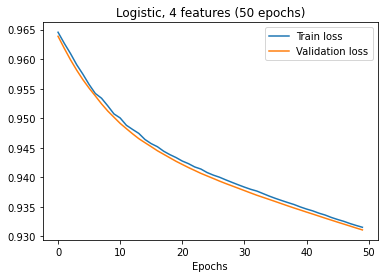

In [ ]:
def plot_loss_history(h, title):
    plt.plot(h.history['loss'], label = "Train loss")
    plt.plot(h.history['val_loss'], label = "Validation loss")
    plt.xlabel('Epochs')
    plt.title(title)
    plt.legend()
    plt.show()

plot_loss_history(history, 'Logistic, 4 features (50 epochs)')

### Predictions and model evaluation

In [ ]:
predictions = model.predict(features_val)
predicted_class = np.where(predictions > 0.5, "virginica", "non-virginica")
target_class = np.where(target_val == 1, "virginica", "non-virginica")
target_class = target_class.reshape(len(target_class),1)

results = target_class == predicted_class

unique, counts = np.unique(results, return_counts=True)
print("\nN. of mismatches (0s) and matches (1s): ")
print(np.asarray((unique, counts)).T)


N. of mismatches (0s) and matches (1s): 
[[ 0  2]
 [ 1 28]]


In [ ]:
if len(counts) > 1:
   n_matches = counts[1]
   n_mismatches = counts[0]
else:
  n_matches = counts[0]
  n_mismatches = 0
  
error_rate = n_mismatches/(n_mismatches+n_matches)
print("Error rate is: {:.2f}".format(round(error_rate,4)))

Error rate is: 0.07


In [ ]:
from sklearn.metrics import confusion_matrix

labels = ['non-virginica','virginica']
con_mat_df = confusion_matrix( y_true = target_class, y_pred = predicted_class, labels=labels)
pd.DataFrame(
    con_mat_df, 
    index = ['pred:'+x for x in labels],
    columns = ['true:'+x for x in labels])

,true:non-virginica,true:virginica
pred:non-virginica,18,2
pred:virginica,0,10


#### On your own (super optional!)

* to improve our understanding of logistic regression we could implement it from scratch, without using keras, following the [steps detailed here](https://towardsdatascience.com/a-logistic-regression-from-scratch-3824468b1f88) (but only if we are very brave)